## La previsión de la demanda.
La previsión de la demanda es la técnica que consiste en estimar la demanda futura de los consumidores durante un determinado periodo de tiempo utilizando datos e información históricos.

El cliente nos proporciona un libro de excel con determinado numero de hojas donde se encuentra la actividad de la empresa en los ultimos 5 años. Nos solicita la previsión de la demanda de una semana futura.

In [18]:
#importamos pandas despues de instalarlo con !pip install pandas
#guardamos el excel e una variable juntando toda la información junta.

import pandas as pd
df = pd.concat(pd.read_excel('Peski.xlsx', sheet_name = None ), ignore_index = True )

In [24]:
df

,Manifest Date,From StationCode,To StationCode,Connote #
0,2018-01-01 06:25:11,GB7103,ES0960,710310154455
1,2018-01-01 09:55:09,GB7103,ES0960,710310153744
2,2018-01-01 10:40:06,GB7103,ES0960,710310154820
3,2018-01-01 10:40:09,GB7103,ES0960,710310154831
4,2018-01-01 10:55:10,GB7103,ES0960,710310154864
...,...,...,...,...
404724,2022-10-31 12:25:25,GB7103,ES0960,710314529901
404725,2022-10-31 12:26:02,SKYRTN,ES0960,720134964975
404726,2022-10-31 12:40:39,SKYRTN,ES0960,720134965222
404727,2022-10-31 12:41:25,GB7103,ES0960,710314529912


## Tratamos los datos.
Es el momento de pedir información a nuestro DataFrame y filtrar lo que necesitamos. Los graficos es una buena manera de visualizar estos datos.

In [25]:
# vemos una columna datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404729 entries, 0 to 404728
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Manifest Date     404729 non-null  datetime64[ns]
 1   From StationCode  404729 non-null  object        
 2   To StationCode    404729 non-null  object        
 3   Connote #         404729 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 12.4+ MB


Podemos observar 404728 filas y 4 columnas. 

In [21]:
# vemos dos estaciones de destino, una con el doble de trabajo.
df['To StationCode'].value_counts()

ES0160    275742
ES0960    128987
Name: To StationCode, dtype: int64

In [26]:
# agregamos dos columnas mas a nuestro DataFame con la fecha y la horas separadas
df['new_date'] = [d.date() for d in df['Manifest Date']]
df['new_time'] = [d.time() for d in df['Manifest Date']]
df

,Manifest Date,From StationCode,To StationCode,Connote #,new_date,new_time
0,2018-01-01 06:25:11,GB7103,ES0960,710310154455,2018-01-01,06:25:11
1,2018-01-01 09:55:09,GB7103,ES0960,710310153744,2018-01-01,09:55:09
2,2018-01-01 10:40:06,GB7103,ES0960,710310154820,2018-01-01,10:40:06
3,2018-01-01 10:40:09,GB7103,ES0960,710310154831,2018-01-01,10:40:09
4,2018-01-01 10:55:10,GB7103,ES0960,710310154864,2018-01-01,10:55:10
...,...,...,...,...,...,...
404724,2022-10-31 12:25:25,GB7103,ES0960,710314529901,2022-10-31,12:25:25
404725,2022-10-31 12:26:02,SKYRTN,ES0960,720134964975,2022-10-31,12:26:02
404726,2022-10-31 12:40:39,SKYRTN,ES0960,720134965222,2022-10-31,12:40:39
404727,2022-10-31 12:41:25,GB7103,ES0960,710314529912,2022-10-31,12:41:25


In [28]:
# separamos los datos de las dos estaciones para trabajar por separado.
es0160 = df["To StationCode"] ==  'ES0160'
df_160 = df[es0160]
df_160

,Manifest Date,From StationCode,To StationCode,Connote #,new_date,new_time
15861,2018-04-09 20:00:00,GB0064,ES0160,56466208400,2018-04-09,20:00:00
16041,2018-04-10 20:00:00,GB0064,ES0160,6486915536,2018-04-10,20:00:00
16078,2018-04-11 16:00:00,GB0064,ES0160,56466335402,2018-04-11,16:00:00
16079,2018-04-11 16:00:00,GB0064,ES0160,56466334385,2018-04-11,16:00:00
16080,2018-04-11 16:00:00,GB0064,ES0160,56466328085,2018-04-11,16:00:00
...,...,...,...,...,...,...
404645,2022-10-28 23:00:00,IT0073,ES0160,007391116430,2022-10-28,23:00:00
404646,2022-10-28 23:00:00,IT0073,ES0160,007391116513,2022-10-28,23:00:00
404692,2022-10-30 15:00:00,GB0064,ES0160,006454273814,2022-10-30,15:00:00
404709,2022-10-31 09:51:39,BG0129,ES0160,012990024512,2022-10-31,09:51:39


In [29]:
es0960 = df["To StationCode"] ==  'ES0960'
df_960 = df[es0960]
df_960

,Manifest Date,From StationCode,To StationCode,Connote #,new_date,new_time
0,2018-01-01 06:25:11,GB7103,ES0960,710310154455,2018-01-01,06:25:11
1,2018-01-01 09:55:09,GB7103,ES0960,710310153744,2018-01-01,09:55:09
2,2018-01-01 10:40:06,GB7103,ES0960,710310154820,2018-01-01,10:40:06
3,2018-01-01 10:40:09,GB7103,ES0960,710310154831,2018-01-01,10:40:09
4,2018-01-01 10:55:10,GB7103,ES0960,710310154864,2018-01-01,10:55:10
...,...,...,...,...,...,...
404724,2022-10-31 12:25:25,GB7103,ES0960,710314529901,2022-10-31,12:25:25
404725,2022-10-31 12:26:02,SKYRTN,ES0960,720134964975,2022-10-31,12:26:02
404726,2022-10-31 12:40:39,SKYRTN,ES0960,720134965222,2022-10-31,12:40:39
404727,2022-10-31 12:41:25,GB7103,ES0960,710314529912,2022-10-31,12:41:25


In [33]:
print(len(df['new_date'].value_counts()))
print(len(df_160['new_date'].value_counts()))
print(len(df_960['new_date'].value_counts()))

1765
1332
1764


## Conclusiones iniciales
El nodo 160 se abrio mas tarde que el 960 pero le supero en volumen de trabajo llegando a doblar su actividad.
Ahora tenemos 3 DataFrames. El primero con la actividad total, y otros dos divididos por estaciones de destino. Los tres tienen columnas añadidas, data y time.

In [35]:
# creamos un nuevo excel y lo guardamos para futuras 
new_date = df_160['new_date'].value_counts()
new_date.to_excel('date_160.xlsx')

In [44]:
# lo mismo con el otro
new_date = df_960['new_date'].value_counts()
new_date.to_excel('date_960.xlsx')

In [45]:
# leemos el excel guardado para trabajar con él.
date_960 = pd.read_excel('date_960.xlsx')
date_960

,Unnamed: 0,new_date
0,2020-03-24,849
1,2020-03-26,816
2,2020-03-25,780
3,2020-03-23,570
4,2020-03-27,565
...,...,...
1759,2018-06-23,2
1760,2019-01-01,2
1761,2019-01-05,1
1762,2019-08-03,1


In [46]:
# lo mismo con este
date_160 = pd.read_excel('date_160.xlsx')
date_160

,Unnamed: 0,new_date
0,2020-12-07,1762
1,2022-06-07,1755
2,2022-06-06,1434
3,2020-12-09,1228
4,2020-12-10,1178
...,...,...
1327,2021-06-13,1
1328,2021-07-10,1
1329,2021-09-11,1
1330,2021-09-18,1


In [47]:
# lo ordenamos por fechas y renomblamos las cabezeras.
date_160_ordenado=date_160.sort_values(by='Unnamed: 0') 
date_160_ordenado.columns = ['date','unidad']
date_160_ordenado

,date,unidad
1331,2018-04-09,1
1313,2018-04-10,1
1043,2018-04-11,66
766,2018-04-13,137
858,2018-04-16,109
...,...,...
255,2022-10-26,326
728,2022-10-27,148
494,2022-10-28,225
1308,2022-10-30,1


In [48]:
# lo ordenamos por fechas y renomblamos las cabezeras.
date_960_ordenado=date_960.sort_values(by='Unnamed: 0') 
date_960_ordenado.columns = ['date','unidad']
date_960_ordenado

,date,unidad
1689,2018-01-01,8
29,2018-01-02,306
504,2018-01-03,88
10,2018-01-04,421
50,2018-01-05,210
...,...,...
903,2022-10-27,63
1265,2022-10-28,38
1397,2022-10-29,28
1559,2022-10-30,17


Matplotlib is building the font cache; this may take a moment.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


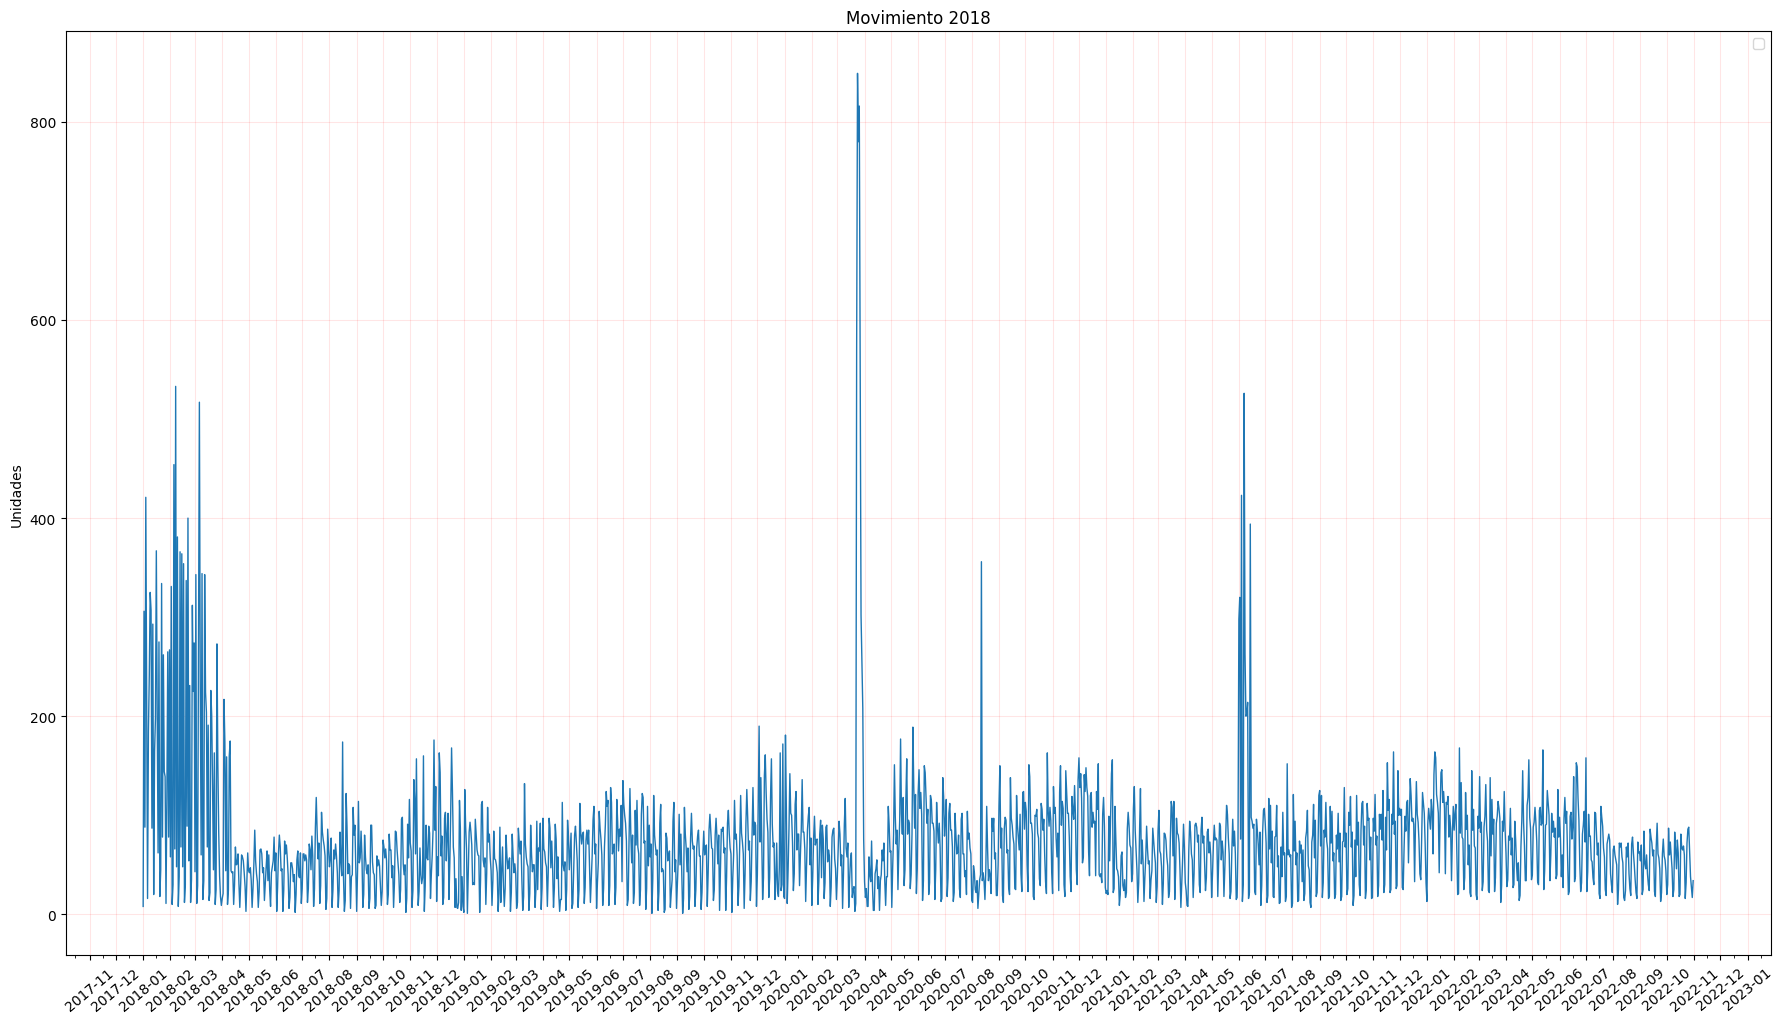

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

y = date_960_ordenado['unidad']
x = date_960_ordenado['date']
fig, ax = plt.subplots(figsize=(22,12))

#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)

ax.xaxis.set_major_locator(dates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))

ax.set_ylabel('Unidades')
ax.set_title('Movimiento 2018')


ax.legend()
plt.grid()
plt.savefig("static\Año 2018.jpg")

plt.show()


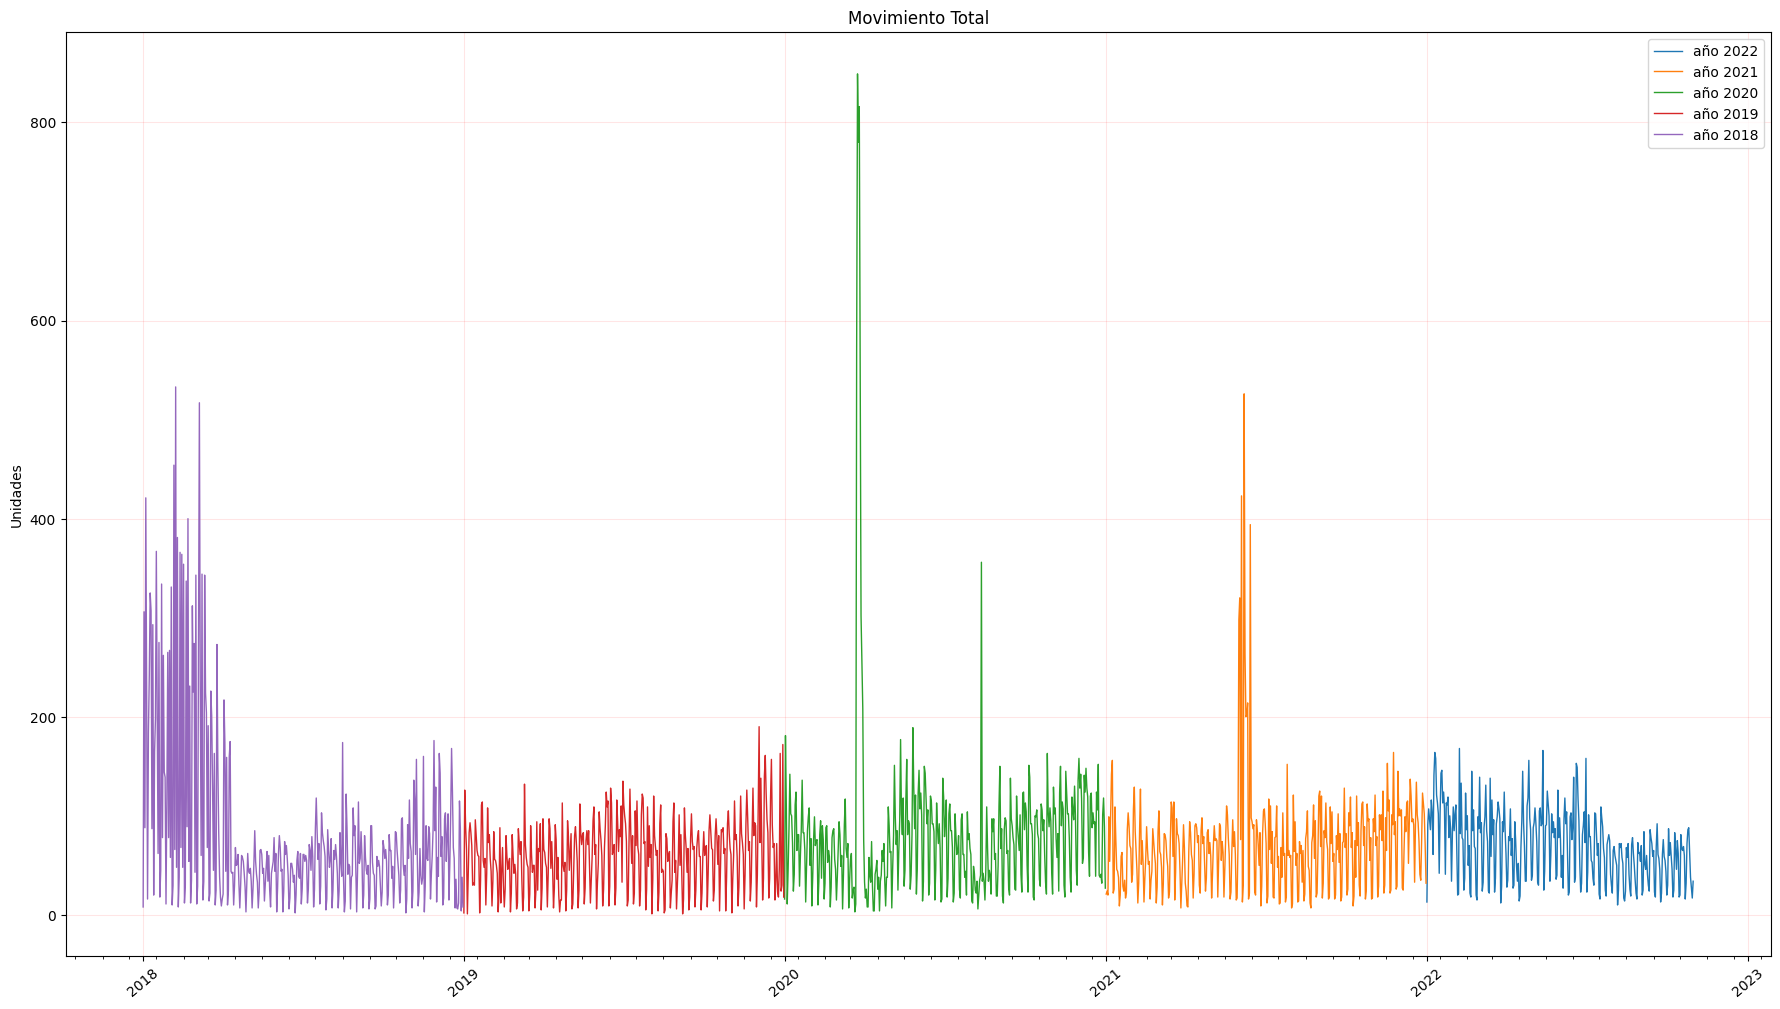

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df = date_960_ordenado
# Convert the date to datetime64
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


  
# Filter data between two dates
df_2022 = df.loc[(df['date'] >= '2022-01-01')
                     & (df['date'] < '2023-01-01')]

df_2021 = df.loc[(df['date'] >= '2021-01-01')
                     & (df['date'] < '2022-01-01')]

df_2020 = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < '2021-01-01')]

df_2019 = df.loc[(df['date'] >= '2019-01-01')
                     & (df['date'] < '2020-01-01')]

df_2018 = df.loc[(df['date'] >= '2018-01-01')
                     & (df['date'] < '2019-01-01')]


y = df_2022['unidad']
x = df_2022['date']

y1 = df_2021['unidad']
x1 = df_2021['date']

y2 = df_2020['unidad']
x2 = df_2020['date']

y3 = df_2019['unidad']
x3 = df_2019['date']

y4 = df_2018['unidad']
x4 = df_2018['date']


fig, ax = plt.subplots(figsize=(22,12))


#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='año 2022')
ax.plot(x1, y1, linewidth=1.0,label='año 2021')
ax.plot(x2, y2, linewidth=1.0,label='año 2020')
ax.plot(x3, y3, linewidth=1.0,label='año 2019')
ax.plot(x4, y4, linewidth=1.0,label='año 2018')

ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)


ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))

ax.set_ylabel('Unidades')
ax.set_title('Movimiento Total')

plt.grid()
ax.legend()
plt.savefig("static\Años por colores.jpg")
plt.show()